In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm



In [2]:
dftrain=pd.read_csv('C:/Users/student/Documents/Senior/Spring/Capstone/Nuveen/WF_Train_round1.csv')

In [3]:
dftest=pd.read_csv('C:/Users/student/Documents/Senior/Spring/Capstone/Nuveen/US_WF_Test_round1.csv', low_memory=False)

In [4]:
model = sm.logit(formula='hy ~ nuveen_t24m_sales_hy_taxable+nuveen_t12m_reds_total+nuveen_t24m_reds_ig_taxable+\
                 asset3p', data=dftrain).fit()
print(model.summary())



Optimization terminated successfully.
         Current function value: 0.048686
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                     hy   No. Observations:                 4824
Model:                          Logit   Df Residuals:                     4819
Method:                           MLE   Df Model:                            4
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:                  0.1825
Time:                        19:55:22   Log-Likelihood:                -234.86
converged:                       True   LL-Null:                       -287.28
Covariance Type:            nonrobust   LLR p-value:                 9.138e-22
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -5.0742      0.190    -26.715      0.000

In [5]:

Xtest = dftest[['nuveen_t24m_sales_hy_taxable', 'nuveen_t12m_reds_total', 'nuveen_t24m_reds_ig_taxable', 'asset3p']]
ytest = dftest['hy']
  
hy_yhat = model.predict(Xtest)


In [6]:
dftest['hy_yhat'] = hy_yhat

In [7]:
print(hy_yhat)

0       0.002983
1       0.046931
2       0.005603
3       0.004366
4       0.004587
          ...   
4819    0.006217
4820    0.005799
4821    0.005176
4822    0.006217
4823    0.004980
Length: 4824, dtype: float64


In [8]:

dftest = dftest.sort_values(by = 'hy_yhat', ascending = False)


In [9]:
dftest['HY_Taxable_Quintile'] = pd.qcut(dftest['hy_yhat'], 4, labels=[i for i in range (4, 0, -1)])

In [10]:
print(dftest['HY_Taxable_Quintile'])

2862    1
561     1
55      1
990     1
106     1
       ..
832     4
4785    4
536     4
745     4
807     4
Name: HY_Taxable_Quintile, Length: 4824, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]


In [11]:
dftest['HY_Taxable_Quintile'] = dftest['HY_Taxable_Quintile'].astype('int')

In [12]:
dftest['HY_Taxable_Quintile'].value_counts().reset_index(name='count')


,index,count
0,2,1917
1,3,1206
2,4,1206
3,1,495


In [13]:

buyers = pd.crosstab(dftest['HY_Taxable_Quintile'], dftest['hy'], normalize='index')



In [14]:
print(buyers)

hy                          0         1
HY_Taxable_Quintile                    
1                    0.911111  0.088889
2                    0.998435  0.001565
3                    0.999171  0.000829
4                    0.994196  0.005804


In [15]:
 dftest.groupby('HY_Taxable_Quintile')['nuveen_t3m_sales_hy_taxable'].mean()

HY_Taxable_Quintile
1    8416.716788
2      80.469484
3      10.899362
4     269.725282
Name: nuveen_t3m_sales_hy_taxable, dtype: float64

In [16]:
dftest['HY_Taxable_Quintile'] = dftest['HY_Taxable_Quintile']+1


<AxesSubplot:title={'center':'Proportion of Advisors Buying 3+ Asset Classes and Buying High Yield Bond Funds'}, xlabel='HY_Taxable_Quintile'>

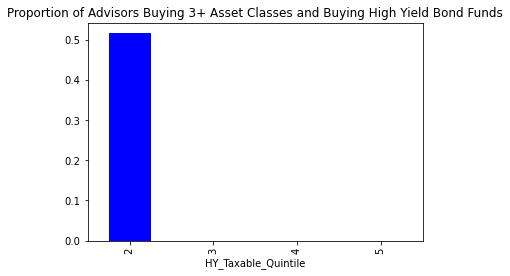

In [17]:
dftest.groupby(by = "HY_Taxable_Quintile")['asset3p'].mean().plot(kind = "bar", title="Proportion of Advisors Buying 3+ Asset Classes and Buying High Yield Bond Funds", color='blue')


<AxesSubplot:title={'center':'Sales of HY Taxable in the Past 21 Mo. by Model Group for HY Sales'}, xlabel='HY_Taxable_Quintile'>

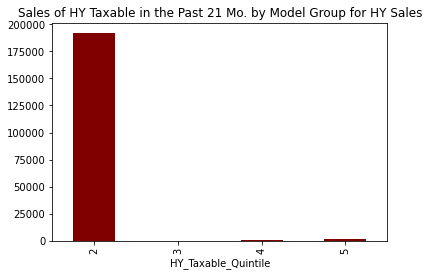

In [18]:
dftest.groupby(by = "HY_Taxable_Quintile")['nuveen_t24m_sales_hy_taxable'].mean().plot(kind = "bar", title="Sales of HY Taxable in the Past 21 Mo. by Model Group for HY Sales", color='maroon')


In [23]:
dftest.to_csv('C:/Users/tdougherty1/Desktop/AA490 Spring23/Wells Fargo/WFTest.csv')